In [21]:
import numpy as np
import gvar as gv
from lsqfit import nonlinear_fit as nlinefit
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # Set style for matplotlib

In [22]:
yerr = np.array(
[5284.49645124+8.93135374e-17j, 5051.67919128+3.11493404e-17j,
 4807.22801984-9.96745526e-17j, 4489.17360148-6.06406902e-17j,
 4377.97247117+1.21565650e-17j, 4380.6955674 -1.10421319e-16j,
 4346.32455056-7.86276657e-18j, 4260.60240681-1.39833078e-16j,
 3954.38421452-1.38915324e-16j, 3511.67798014-2.63737534e-17j,
 2965.85763576-1.38912157e-16j, 2391.66434172-8.99717287e-17j,
 1974.20588689-4.48188688e-17j, 1678.99538258+9.43185149e-17j,
 1427.70254067+7.24178200e-17j, 1229.20302781+2.93408782e-17j,
 1061.10708499+4.26686856e-18j,  924.71166   -3.01381787e-18j,
  813.88122708+3.18467380e-17j,  699.97216522+1.03711787e-17j,
  606.11518144+1.28684281e-17j,  547.62904331+2.66670686e-18j,
  490.72093772-1.41156404e-17j,  449.0226981 -4.43612523e-18j,
  408.7760965 +5.36131521e-18j,  361.60717439+1.39980958e-17j,
  318.75627783-8.03729844e-18j,  281.38038705+7.15719667e-18j,
  246.40055377-2.45184362e-18j,  200.93011499-4.78853500e-18j,
  167.14109494-2.21807769e-18j,  139.43450603+1.11062578e-18j,
  115.81855454+5.76382540e-20j,   98.97281988+5.51014574e-19j,
   90.56639167+1.86114211e-19j,   86.85177155+1.50281485e-18j,
   86.4502209 -1.16068262e-19j,   88.08961863+2.04023319e-19j,
   94.75828057-1.46722749e-19j,  105.62661497-1.54799229e-18j,
  120.63368535-1.07594427e-18j,  138.74616426-4.01530307e-18j,
  156.47251289-4.74983016e-18j,  177.08881048+3.28946297e-19j,
  199.07696021-7.46622168e-19j,  219.89251353-2.51238650e-19j,
  234.27082931-2.60954597e-18j,  253.6752328 -2.09948455e-18j,
  283.70259817-4.07887063e-18j,  327.66477826-6.30603716e-18j,
  384.29585248-7.19092161e-18j,  455.50708184+4.09233398e-18j,
  542.52688762+3.72569254e-18j,  644.22431819-9.21774578e-18j,
  742.24591929-1.90710814e-17j,  852.43385935-9.02945193e-18j,
  991.36217009-1.90842545e-17j, 1145.20355429-2.40208933e-17j,
 1321.94151312-3.33673130e-17j, 1525.25404086+4.94461784e-18j,
 1693.47838039+3.71450074e-17j, 1865.29953605-1.83445522e-17j,
 2004.14837992-2.76086782e-17j, 2121.8988725 +4.08822535e-17j,
 2244.42687723+1.37474257e-17j, 2425.57571024+1.10194081e-17j,
 2680.31352008+2.97301591e-17j, 3028.00897683+1.54575174e-18j,
 3381.01515544-5.56335678e-17j, 3827.22015744-9.66370128e-17j,
 4335.33467735+1.63213299e-17j, 4830.7320275 -1.07559132e-16j,])


y = np.array(
[363812.80805418+2.23425563e-15j, 287286.45530765-1.42136723e-16j,
 244232.4692056 -2.22720757e-16j, 208152.70417627-2.42391187e-16j,
 178561.60004581-1.00463098e-16j, 153619.3166977 -9.58516257e-16j,
 131980.69596709-4.64603602e-17j, 113335.01374143-3.06852183e-16j,
  96998.90173915-4.00092893e-16j,  82630.03089888-1.26248227e-16j,
  70231.24092758-7.25012526e-17j,  59609.72648694-2.67223360e-16j,
  50711.38400685-7.27541475e-17j,  43207.86274673+2.83893427e-16j,
  36740.23729322+9.38054667e-17j,  31312.79929639+1.80476044e-16j,
  26784.91961889+1.28845803e-16j,  22937.64754615+8.39045554e-17j,
  19648.43389006+4.20091396e-17j,  16856.1113973 -2.42071269e-17j,
  14489.53480717+3.31646177e-17j,  12495.94838707+3.52517364e-17j,
  10811.49903984-4.00634460e-17j,   9390.90941055+2.03325177e-18j,
   8140.20086542-5.80804846e-18j,   7030.95040303+3.28446179e-17j,
   6070.95660026-3.23950878e-17j,   5238.8901325 +1.57057602e-17j,
   4545.20056688-1.88715991e-17j,   3960.09781588-2.01518089e-17j,
   3489.50587929-3.30948996e-18j,   3111.19524781+1.74678418e-17j,
   2806.21298836+9.21054235e-18j,   2591.70004285+4.83346478e-18j,
   2456.58642525+2.74997541e-18j,   2378.07985797+8.76454624e-18j,
   2360.43326018-8.95720288e-18j,  2403.43512434+2.38674521e-18j,
   2505.96183975-7.95122907e-18j,   2672.82737552-1.64245109e-17j,
   2913.412805  +6.15551224e-18j,   3224.48130625-8.15448028e-18j,
   3595.13181151-4.22219763e-19j,   4045.92511212+1.04340295e-17j,
   4565.4473157 +7.14110577e-18j,   5149.01011597-1.92759089e-17j,
   5830.44683521-2.31094702e-17j,   6675.02028336-3.13071269e-17j,
   7711.56181535-3.58023397e-17j,   8963.88407313+1.52251720e-18j,
  10450.21076271-1.65059129e-17j,  12258.05969162-3.13909482e-18j,
  14389.00157774-2.35109571e-17j,  16851.52218762+7.32383451e-17j,
  19719.37866948+3.69306793e-17j , 23061.90870079-1.37676764e-17j,
  27036.3832162 -1.34346519e-16j , 31737.10037499-9.92384546e-17j,
  37305.95591428-1.43877812e-16j,  43834.45059581+2.10649446e-16j,
  51148.46949152+4.34225386e-17j,  59537.31492918-1.38392620e-17j,
  68971.84005713+6.24649058e-17j,  79556.32818499+3.52056127e-16j,
  92094.20665735+8.68792031e-17j, 107240.25758975+1.85554143e-16j,
 125378.91050401+2.84027529e-16j, 147128.62015728+7.88906321e-17j,
 172900.88287838-5.51528540e-16j, 204409.57251044-4.14057168e-16j,
 242113.06699941-3.87390179e-16j, 286446.24665647-2.88577072e-16j]
)

In [23]:
print(len(y))
print(len(yerr))

72
72


In [24]:
y=y.real
yerr=yerr.real

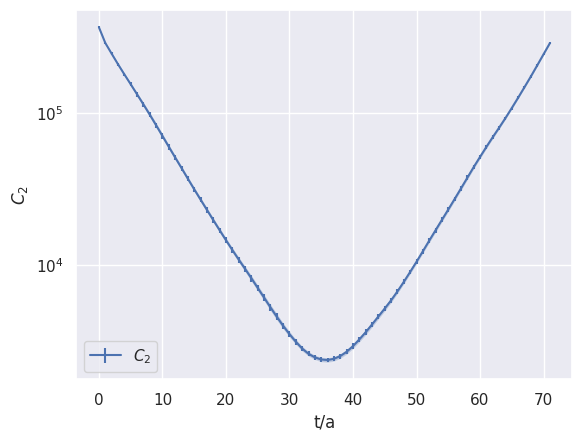

In [25]:
x = np.arange(len(y))

plt.errorbar(x=x, y=y, yerr=yerr, label='$C_2$')
plt.fill_between(x=x, y1=y-yerr, y2=y+yerr, alpha=0.3)
# plt.plot(x, modelFunc(x, dict(C0=params[0], E0=params[1])), label='$best fit$')
plt.xlabel('t/a')
plt.ylabel('$C_2$')
plt.yscale("log")
plt.legend()
plt.savefig("./zfit.png")
# plt.show()